Se realizará el análisis gráfico de las vacunas aplicadas COVID-19 en Argentina según su rango etario

In [162]:
#import librerias necesarias

import numpy as np 
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter


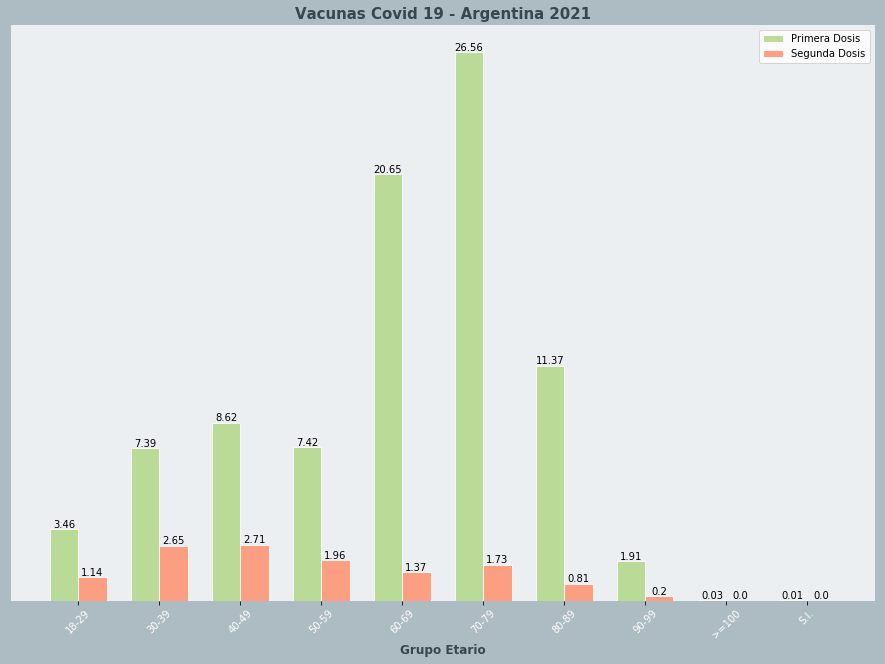

Total de poblacion vacunada con la primera dosis:  5851232
Total de poblacion vacunada con la segunda dosis:  842206
Total de vacunas aplicadas:  6693438


In [183]:
#URL donde se aloja el dataset publico brindado por el ministerio de salud
myUrl = "https://sisa.msal.gov.ar/datos/descargas/covid-19/files/datos_nomivac_covid19.zip"
#filename="C:/Users/lbejaran/Documents/PYTHON DS/covid_test.csv"
#Leer el dataset y utilizamos solo las columnas que nos interesan
data = pd.read_csv(myUrl,usecols=["grupo_etario","orden_dosis","vacuna"])
#Agrupamos el dataset por grupo etario y la dosis, se cuenta la aplicacion de las dosis por la columna vacuna
df = data.groupby(["grupo_etario","orden_dosis"], as_index=False).count()
#Filtro cantidad 1 dosis aplicadas
do1 = df[df.orden_dosis == 1]
#Filtro cantidad 2 dosis aplicadas
do2 = df[df.orden_dosis == 2]

fig = plt.figure()

ax = fig.add_axes([1,1,2,2])

fig.patch.set_facecolor('#78909C')
fig.patch.set_alpha(0.6)

indx = np.arange(len(do1.grupo_etario)) # the x locations for the groups
bar_width = 0.35 # the width of the bars

label1 = "Primera Dosis"
label2 = "Segunda Dosis"
color1 = "#AED581"
color2 = "#FF8A65"

poblacion = 44490000

total_vac = do1.vacuna.sum() + do2.vacuna.sum()

#x_labels = ["18-29","30-39","40-49","50-59","60-69","70-79","80-89","90-99"]

ax.set_title("Vacunas Covid 19 - Argentina 2021", fontweight="bold", color="#37474F",fontsize=15)
ax.set_xlabel("Grupo Etario", fontweight="bold", fontsize="large", color="#37474F")
#ax.set_ylabel("% Vacunación", fontweight="bold", color = "#37474F", fontsize="large")
ax.set_xticklabels(do1.grupo_etario, rotation=45)
ax.set_xticks(indx)

# use a gray background
ax.set_facecolor('#ECEFF1')
#ax.set_axisbelow(True)
# draw solid white grid lines
#plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
#Oculta eje Y
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
#ax.tick_params(colors='w', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('w')
for tick in ax.get_yticklabels():
    tick.set_color('w')

bars1 = plt.bar(indx - bar_width/2, ((100*do1.vacuna).div(total_vac)).round(2), bar_width, color=color1, label=label1, alpha= 0.8, edgecolor='w')
bars2 = plt.bar(indx + bar_width/2, ((100*do2.vacuna).div(total_vac)).round(2), bar_width, color=color2, label=label2, alpha= 0.8, edgecolor='w')

for bar in bars1:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height}', ha='center',
  va='bottom')

for bar in bars2:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height}', ha='center',
  va='bottom' )

# Add this loop to add the annotations
"""
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')
"""

plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.show()

#Analisis 

print("Total de poblacion vacunada con la primera dosis: ", do1.vacuna.sum())
print("Total de poblacion vacunada con la segunda dosis: ", do2.vacuna.sum())
print("Total de vacunas aplicadas: ", do1.vacuna.sum() + do2.vacuna.sum())